In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import (
    mutual_info_classif,

    SelectKBest
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict,
    GridSearchCV
)
from sklearn.feature_selection import (
    mutual_info_classif,
    SelectKBest,

)
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    f1_score,
    fbeta_score,
    make_scorer
)
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

%matplotlib inline

Load Data:

In [2]:
df = pd.read_csv('./cancerpatientdatasets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df = df.drop('index', axis=1)
df = df.drop('Patient Id', axis=1)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


Normalización y plot

In [4]:
X_cancer = df.values[:, :-1]
Y_cancer = df.values[:,-1]

In [5]:
# One way is to standarize all data mean 0, std 1
scaler = StandardScaler().fit(X_cancer)
X2=scaler.transform(X_cancer)

for i in range(13):
    print('std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())

std: 1.0 min -1.9312489879092853 max 2.9856272650745685
std: 0.9999999999999999 min -0.8199029227143814 max 1.2196565865253737
std: 1.0000000000000002 min -1.3994393371741625 max 2.0498829727621537
std: 0.9999999999999998 min -1.3603566476455784 max 1.3122497327976013
std: 1.0 min -2.103703049027213 max 1.4319323274891114
std: 1.0 min -1.8227117979773821 max 1.499939917085554
std: 1.0 min -1.6839648677750145 max 1.1383226201160712
std: 0.9999999999999999 min -1.8294072056713275 max 1.4180612067629816
std: 1.0 min -1.6355425673686577 max 1.1754730167653862
std: 0.9999999999999999 min -1.6314646066839011 max 1.1935823312968803
std: 0.9999999999999998 min -1.18172724995562 max 1.6242736827748208
std: 0.9999999999999999 min -1.3827444336760142 max 1.6467425884623577
std: 1.0 min -1.5085106404251523 max 2.001694456550188


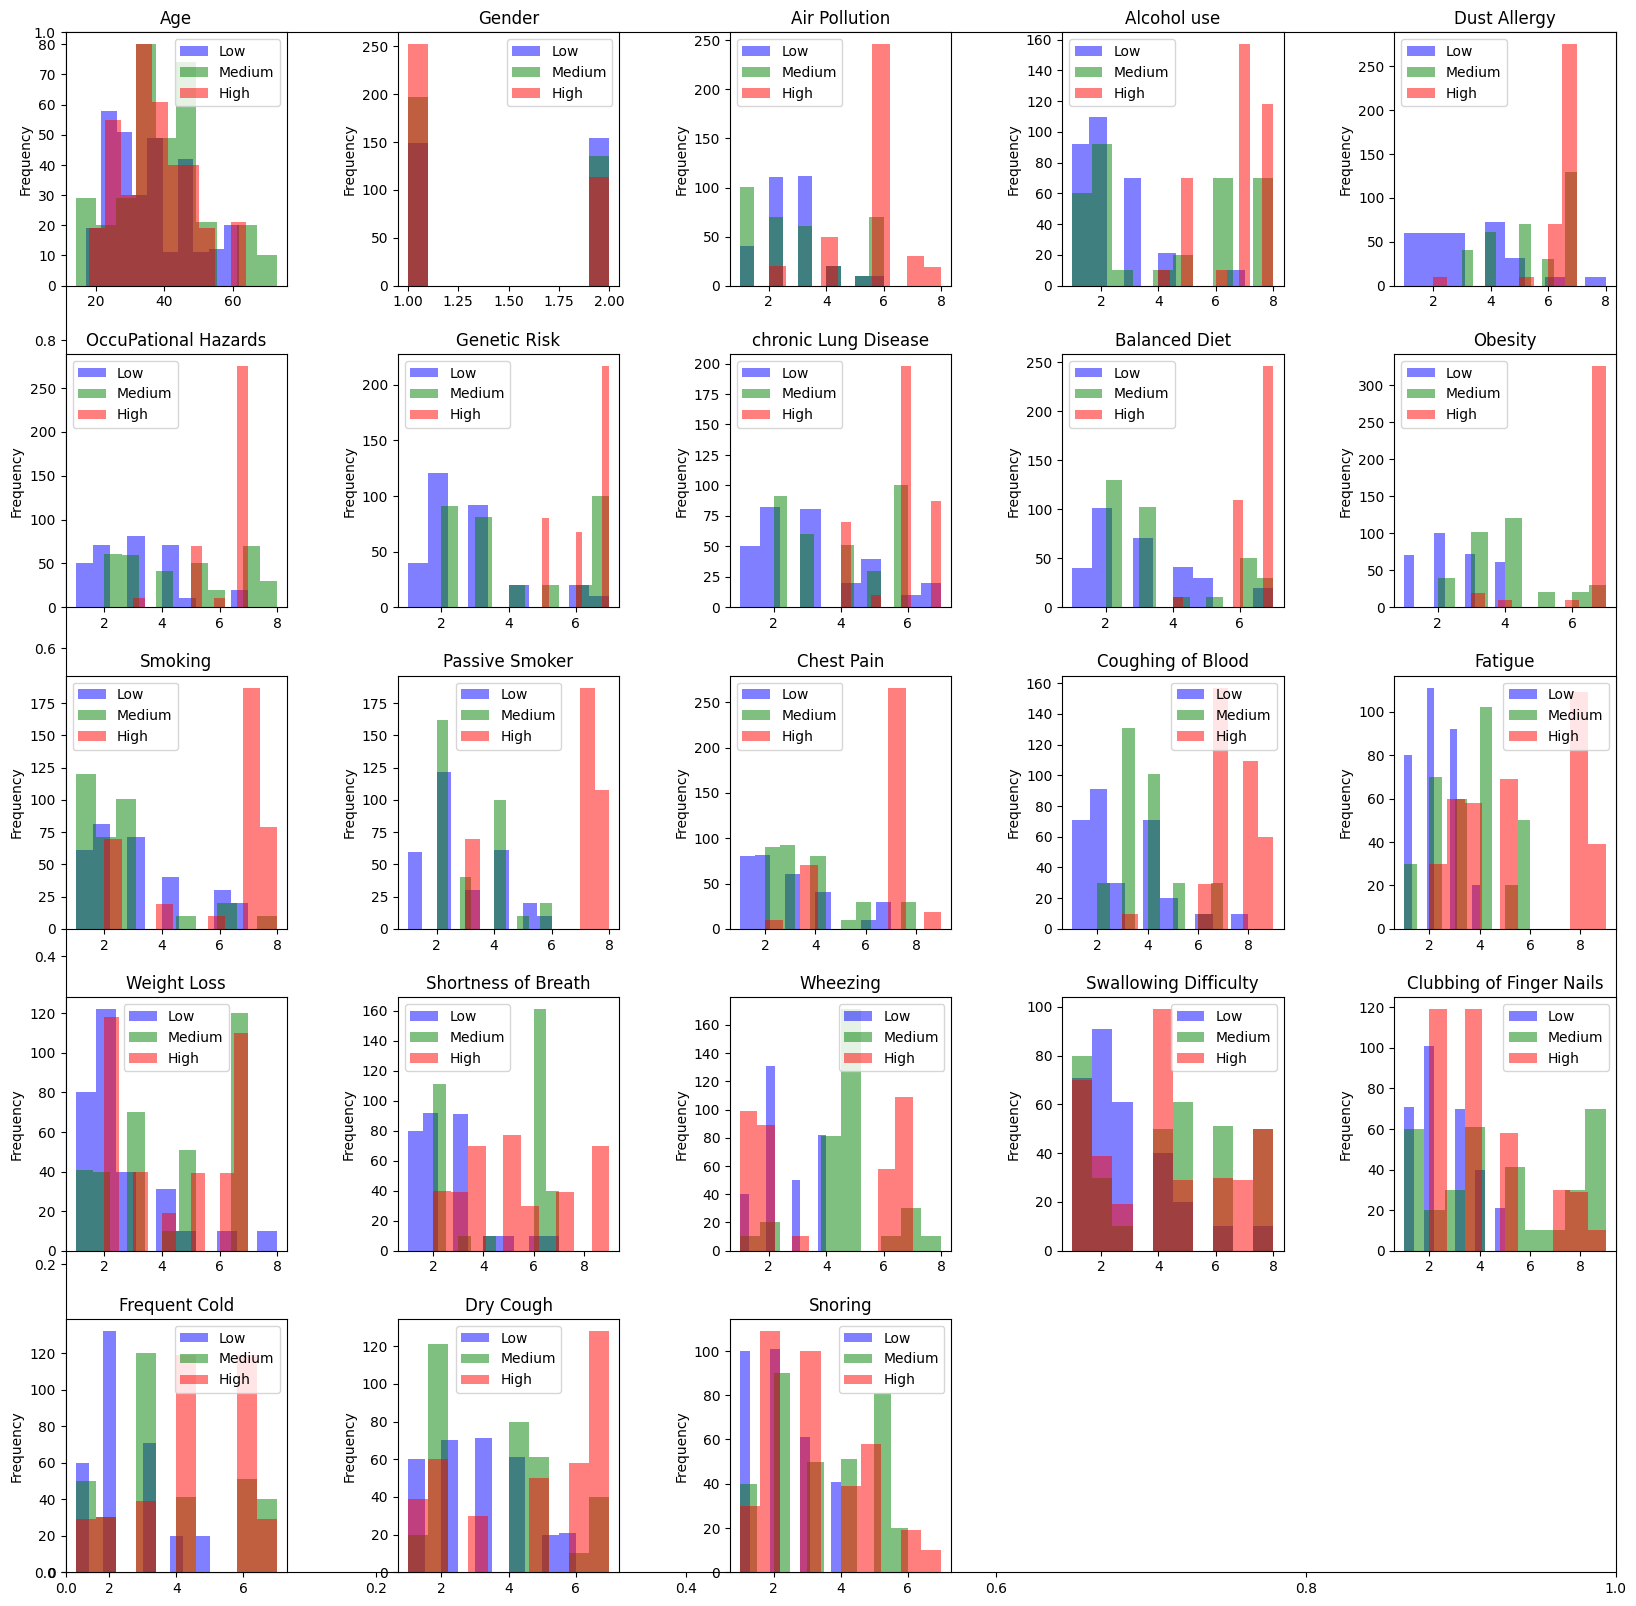

In [6]:
plt.subplots(figsize=(20, 20))
plt.subplots_adjust(hspace=0.27, wspace=0.5)
for i in range(1,24):
    plt.subplot(5,5,i)
    column_name = df.columns[i-1]
    df[df['Level'] == "Low"][column_name].plot.hist(bins=10, alpha=0.5, label='Low', color='blue')
    df[df['Level'] == "Medium"][column_name].plot.hist(bins=10, alpha=0.5, label='Medium', color='green')
    df[df['Level'] == "High"][column_name].plot.hist(bins=10, alpha=0.5, label='High', color='red')
    plt.title(f'{column_name}')
    plt.legend()
plt.show()

In [7]:
nrcols=23
col = np.random.random(size=(X2.shape[0],nrcols))
scaler = StandardScaler().fit(col)
irelevant = scaler.transform(col)
for i in range(nrcols):
    print('std:',irelevant[:,i].std(),'min',irelevant[:,i].min(),'max',irelevant[:,i].max())

std: 1.0000000000000007 min -1.7753540851560594 max 1.692373317506832
std: 1.000000000000001 min -1.7236385467379314 max 1.7278488087518737
std: 1.0000000000000004 min -1.7341942456938992 max 1.7337334974523353
std: 1.0000000000000009 min -1.7656561197599898 max 1.708522925953395
std: 0.9999999999999999 min -1.7492755650017207 max 1.780614271506477
std: 1.0000000000000002 min -1.7178718664368036 max 1.7071458636527244
std: 0.9999999999999993 min -1.670321570676666 max 1.713036592737815
std: 1.0 min -1.7641453212368183 max 1.7920155622066662
std: 0.9999999999999994 min -1.7585900217223083 max 1.725401565097339
std: 0.9999999999999998 min -1.6923442562175937 max 1.766602894644365
std: 1.0 min -1.7550160430481705 max 1.7366780067354508
std: 1.0000000000000002 min -1.7292647202200269 max 1.7402351697007379
std: 0.9999999999999993 min -1.7087717114600705 max 1.7626378913628757
std: 1.0000000000000007 min -1.6606665478233067 max 1.8790430012323478
std: 0.9999999999999993 min -1.6782164183781

Observamos la correlación entre las variables para observar si existe la independencia entre estas.

Text(0.5, 1.0, 'Matriz de Correlación')

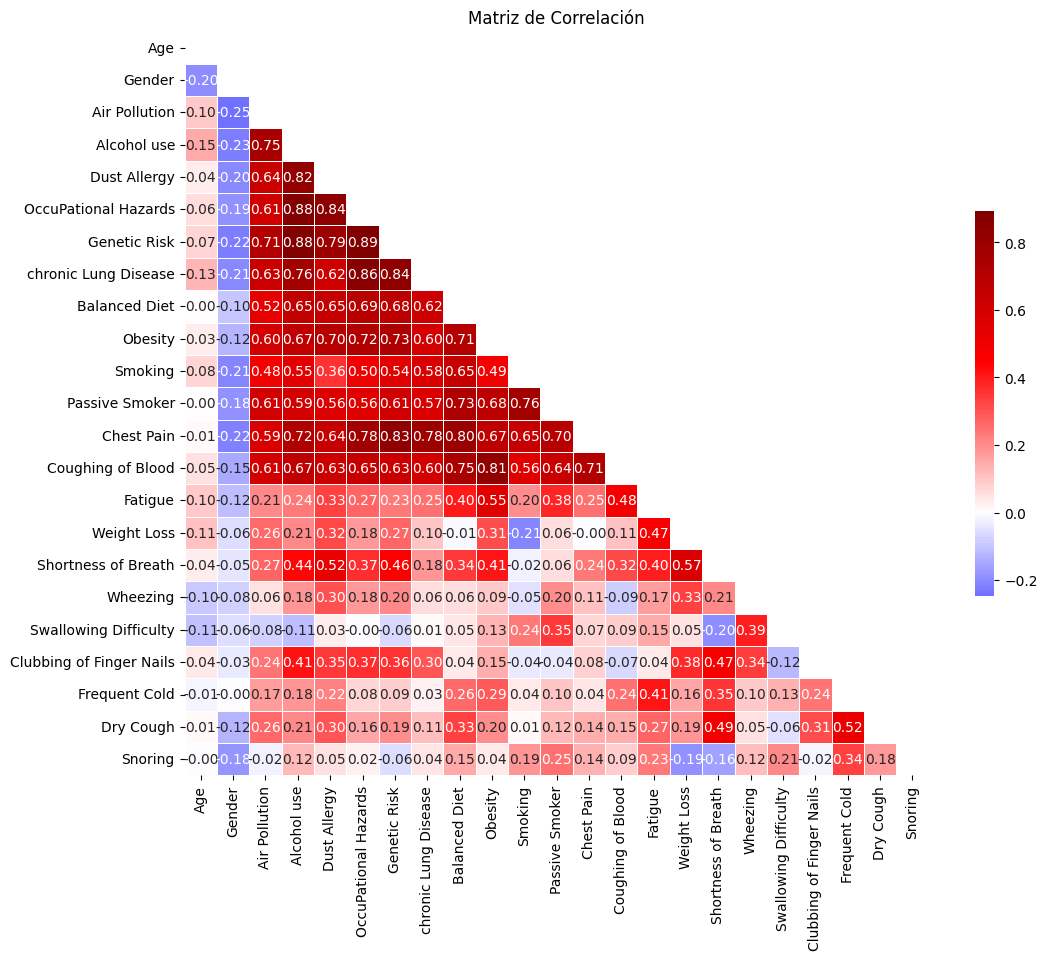

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

column_labels = df.columns[:-1]  # Ajusta si tus etiquetas están en otro lugar
X_cancer_df = pd.DataFrame(X_cancer, columns=column_labels)
corr = X_cancer_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='seismic', center=0, 
            square=True, linewidths=.5, annot=True, fmt=".2f",
            cbar_kws={"shrink": .5})

plt.title("Matriz de Correlación")

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y_cancer, random_state = 42, test_size = 0.2)

Test on test data

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print("Test Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print(classification_report(y_test, y_pred))

Test Accuracy: 0.895
Cross-Validation Scores: [0.8875 0.8875 0.8875 0.9    0.9   ]
Mean Cross-Validation Accuracy: 0.8924999999999998
              precision    recall  f1-score   support

        High       0.87      0.96      0.91        82
         Low       1.00      0.85      0.92        55
      Medium       0.85      0.84      0.85        63

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



Comprovamos la  Suficiencia del Número de Elementos

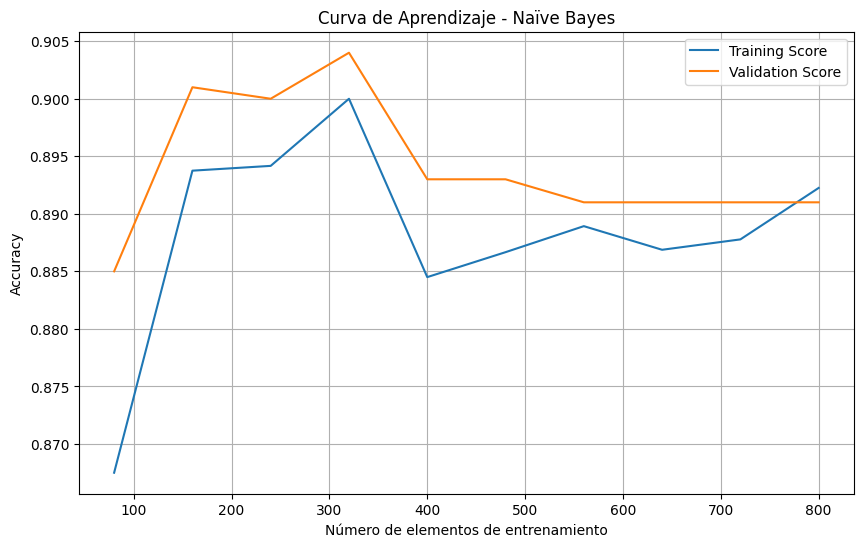

In [11]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    GaussianNB(), X_cancer, Y_cancer, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation Score")
plt.title("Curva de Aprendizaje - Naïve Bayes")
plt.xlabel("Número de elementos de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

Vemos que sí hay suficiencia de elementos: El modelo parece tener suficientes datos para alcanzar un buen equilibrio entre entrenamiento y validación.

No hay sobreajuste evidente:

Si hubiera sobreajuste, la curva de entrenamiento sería muy alta y la de validación sería mucho más baja, lo cual no ocurre aquí. Ambas curvas son cercanas y tienden a estabilizarse.
Número de elementos:

A partir de 500 elementos, la curva de validación se vuelve casi plana, lo que sugiere que el modelo ha alcanzado un límite en su capacidad de generalización con el tamaño actual de los datos.